In [1]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

C:\Users\jorge\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
X=np.load("Cred_features.npy")
y=np.load("Cred_labels.npy")
print(X.shape)
print(y.shape)

(56961, 30)
(56961,)


## Random Forest

In [3]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Separando uma parte dos dados para validação (usaremos no GridSearchCV)
X,X_val,y,y_val=train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

#Parâmetros
params = [{'n_estimators': [10, 25, 50, 75, 100], 'criterion': ['gini', 'entropy', 'log_loss'], 'max_depth': [2, 5, 10]}]

clf = RandomForestClassifier()

gs = GridSearchCV(clf, params, scoring='accuracy', cv=5, n_jobs=-1)
gs.fit(X_val, y_val)

clf = gs.best_estimator_
print(f"Os melhores parâmetros foram: {gs.best_params_}")

C:\Users\jorge\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.99894671 0.99903451 0.99903451 0.99903451 0.99903451 0.99929782
 0.99938562 0.99947338 0.99956113 0.99938562 0.99912231 0.99956113
 0.99964889 0.99956113 0.99956113 0.99894675 0.99903451 0.99903451
 0.99903451 0.99903451 0.99903451 0.99938562 0.99938562 0.99938558
 0.99938562 0.99912223 0.99947338 0.99947338 0.99938562 0.99938562
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan]
  warnings.warn(


Os melhores parâmetros foram: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 50}


Acurácia média: 0.999
Precisão: 0.95
Revocação: 0.85
F1: 0.90


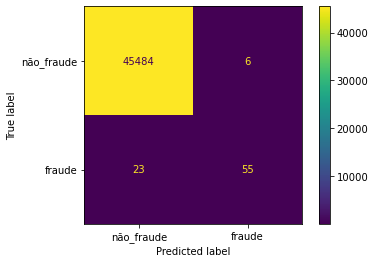

In [11]:
# Usando validação cruzada com T=5 folds
result=model_selection.cross_val_score(clf, X, y, cv=5)
print("Acurácia média: %.3f" % result.mean())

#Calculando a predição para cada exemplo de teste
y_pred=model_selection.cross_val_predict(clf, X, y, cv=5)

#Cálculo de precisão
precisao = precision_score(y, y_pred, average='macro')

#Calculando a revocação
recall = recall_score(y, y_pred, average='macro')

#Calculando o F1-Score
f1 = f1_score(y, y_pred, average='macro')

print("Precisão: {:.2f}".format(precisao))
print("Revocação: {:.2f}".format(recall))
print("F1: {:.2f}".format(f1))

matrix=confusion_matrix(y, y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=['não_fraude', 'fraude'])
disp.plot()